# Import Ntuple

In [46]:
%load_ext autoreload
%autoreload 2

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util

training_variables = util.training_variables
columns = util.all_relevant_variables

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# 4S Data vs MC

cut = '(B0_dr<0.1)'

# Load data files
MC_4S = uproot.concatenate([f'../../Samples/MC15ri/e_channel/local_200fb_test/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

data_4S = uproot.concatenate([f'../../Samples/Data/e_channel/proc13_4S_quaxo_1.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

df_mc_4S = pd.DataFrame(MC_4S)
df_data_4S = pd.DataFrame(data_4S)

In [61]:
# 4S Data vs MC, mu channel

cut = '(-4<B0_roeDeltae_my_mask) & (B0_roeDeltae_my_mask<1) & (B0_dr<0.1)'

# Load data files
MC_4S = uproot.concatenate([f'../../Samples/MC15ri/mu_channel/local_200fb_test/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

data_4S = uproot.concatenate([f'../../Samples/Data/mu_channel/proc13_4S_quaxo_1.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

df_mc_4S = pd.DataFrame(MC_4S)
df_data_4S = pd.DataFrame(data_4S)

In [62]:
lgb_tight = 'sig_prob>0.5 and fakeD_prob<0.1 and continuum_prob<0.5 and combinatorial_prob<0.5'
lgb_loose = 'fakeD_prob<0.1 and continuum_prob<0.5 and combinatorial_prob<0.5'
lgb_none = 'fakeD_prob<1'

for df in [df_mc_4S,df_data_4S,]:
    # df.eval(f'cos_D_l = (D_px*ell_px + D_py*ell_py + D_pz*ell_pz)/(D_p*ell_p)', inplace=True)
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df.eval('p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

df_mc_4S_lgb = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_loose, library='lgbm')
df_data_4S_lgb = util.apply_mva_bcs(df_data_4S, training_variables, lgb_loose, library='lgbm')

In [57]:
samples=util.classify_mc_dict(df_mc_4S_lgb, 'e', template=False)
mpl=util.mpl(samples,df_data_4S_lgb)

for name, df in samples.items():
    print(name, len(df))

bkg_fakeD 70965
bkg_TDFl 5119
bkg_fakeTracks 2377
bkg_continuum 18292
bkg_combinatorial 13714
bkg_singleBbkg 6092
bkg_other_TDTl 0
$D\tau\nu$ 1885
$D^\ast\tau\nu$ 1143
$D\ell\nu$ 39171
$D^\ast\ell\nu$ 26263
$D^{\ast\ast}\tau\nu$ 774
$D^{\ast\ast}\ell\nu$_narrow 8452
$D^{\ast\ast}\ell\nu$_broad 6270
$D\ell\nu$_gap_pi 2006
$D\ell\nu$_gap_eta 1677
bkg_other_signal 0


In [63]:
samples=util.classify_mc_dict(df_mc_4S_lgb, 'mu', template=False)
mpl=util.mpl(samples,df_data_4S_lgb)

for name, df in samples.items():
    print(name, len(df))

bkg_fakeD 45771
bkg_TDFl 10862
bkg_fakeTracks 1446
bkg_continuum 5834
bkg_combinatorial 5465
bkg_singleBbkg 2589
bkg_other_TDTl 0
$D\tau\nu$ 883
$D^\ast\tau\nu$ 572
$D\ell\nu$ 25776
$D^\ast\ell\nu$ 17806
$D^{\ast\ast}\tau\nu$ 402
$D^{\ast\ast}\ell\nu$_narrow 5842
$D^{\ast\ast}\ell\nu$_broad 4341
$D\ell\nu$_gap_pi 1212
$D\ell\nu$_gap_eta 1071
bkg_other_signal 0


# Control regions

### 1. roeMbc<5
### subtract fakeD

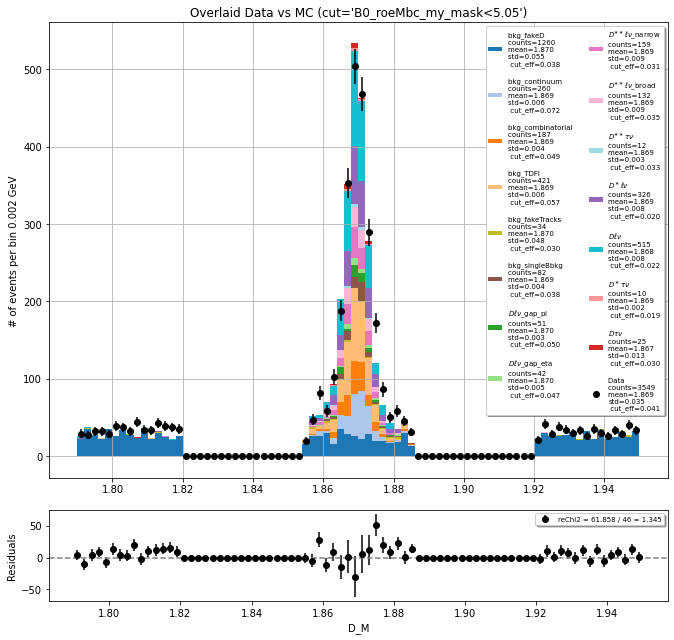

In [95]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,81)
weights={'all_mc':187/200}
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_roeMbc_my_mask<5.05',correction=False,mask=[],
    figsize=(12,9),ratio=False,legend_nc=2,legend_fs=7,
    weights=weights)

In [23]:
fitter = util.fit_Dmass(x_edges=b1, hist=data_hist_all, poly_only=True)
m_ml, c_ml, result_ml = fitter.fit_gauss_poly_ML(deg=1)
m_ml

initial parameters= [ 1.780e+01  1.870e+00  4.000e-02  8.919e+03 -6.100e+00  1.082e+02]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.52 (chi2/ndof = 0.9)    │              Nfcn = 75               │
│ EDM = 3.09e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.00    │   0.18    │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  40.0e-3  │  0.4e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │  7.73e3   │  0.15e3   │            │            │         │         │       │
│ 4 │ x4   │    -0     │    100    │            │            │         │         │       │
│ 5 │ x5   │   0.1e3   │   3.3e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0         0 │
│ x1 │         0         0         0         0         0         0 │
│ x2 │         0         0         0         0         0         0 │
│ x3 │         0         0         0  2.13e+04     -74.9 -1.94e+03 │
│ x4 │         0         0         0     -74.9  9.95e+03 -3.05e+05 │
│ x5 │         0         0         0 -1.94e+03 -3.05e+05  1.05e+07 │
└────┴─────────────────────────────────────────────────────────────┘

In [24]:
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)

Yields from 1.79 to 1.82 = 1452.488 ± 39.457
Yields from 1.855 to 1.885 = 1449.377 ± 27.391
Yields from 1.92 to 1.95 = 1446.266 ± 38.327


In [19]:
a = len(df_data_4S_lgb.query('1.79<D_M<1.82 and B0_roeMbc_my_mask<5.05'))
b = len(df_data_4S_lgb.query('1.92<D_M<1.95 and B0_roeMbc_my_mask<5.05'))
print('data', a,b)

data 1465 1388


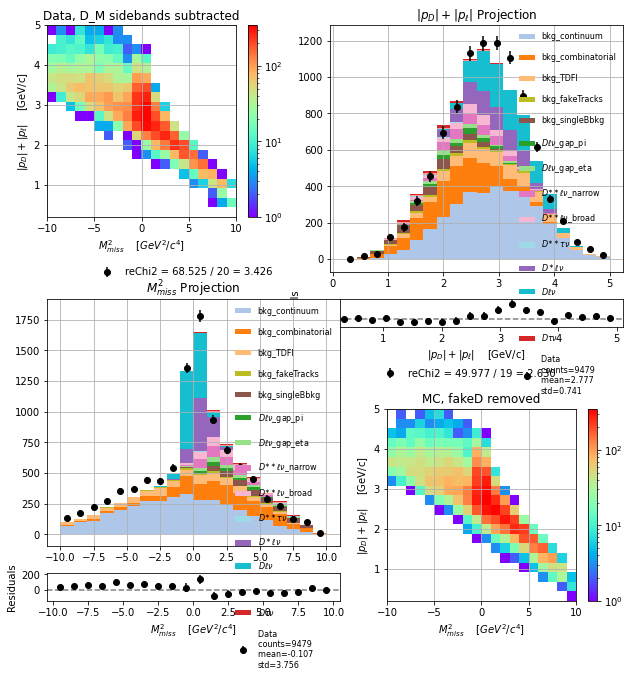

In [14]:
# e channel, lgb_loose
b_mm2 = np.linspace(-10,10,21)
b_pDl = np.linspace(0.2,5,21)
scale1 = {'data left sideband': 1449/1452/2,
         'data right sideband': 1449/1446/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale1,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

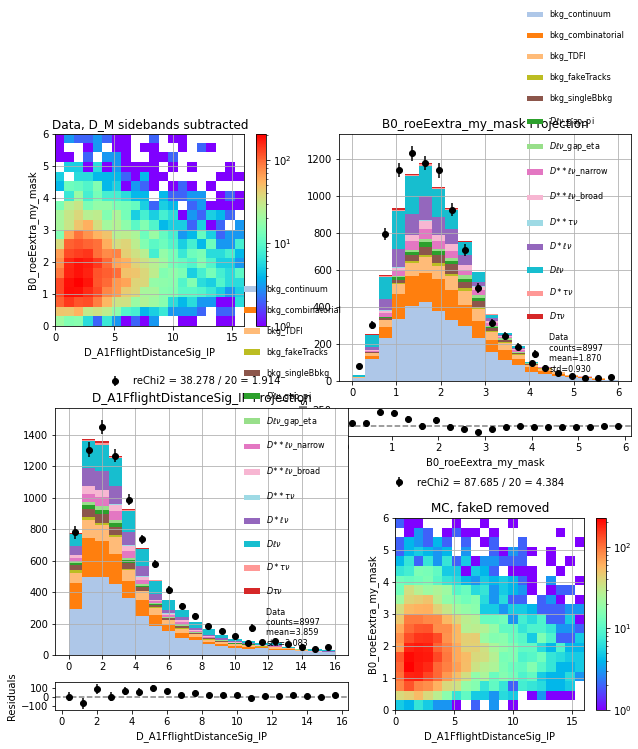

In [15]:
# e channel, lgb_loose
b_mm2 = np.linspace(0,16,21)
b_pDl = np.linspace(0,6,21)

par_dict={'var_list':['D_A1FflightDistanceSig_IP','B0_roeEextra_my_mask'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale1,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

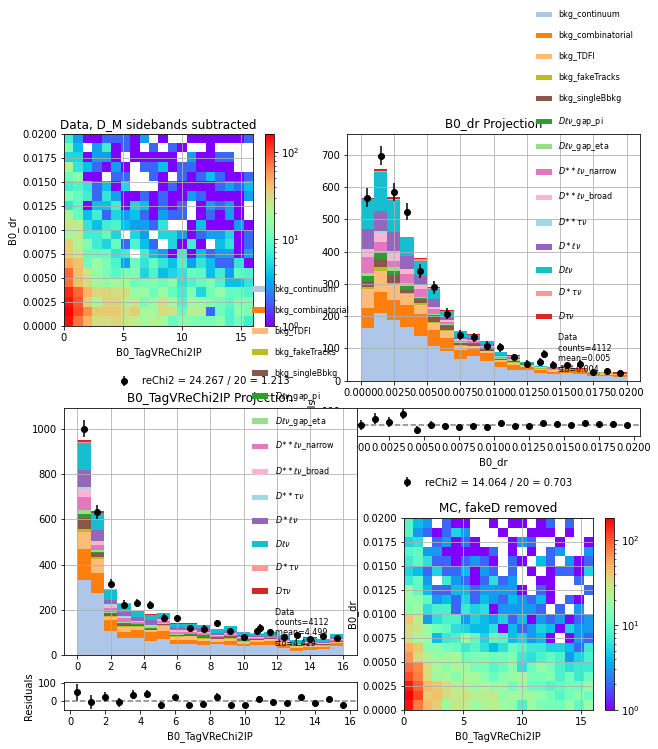

In [16]:
# e channel, lgb_loose
b_mm2 = np.linspace(0,16,21)
b_pDl = np.linspace(0,0.02,21)

par_dict={'var_list':['B0_TagVReChi2IP','B0_dr'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale1,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

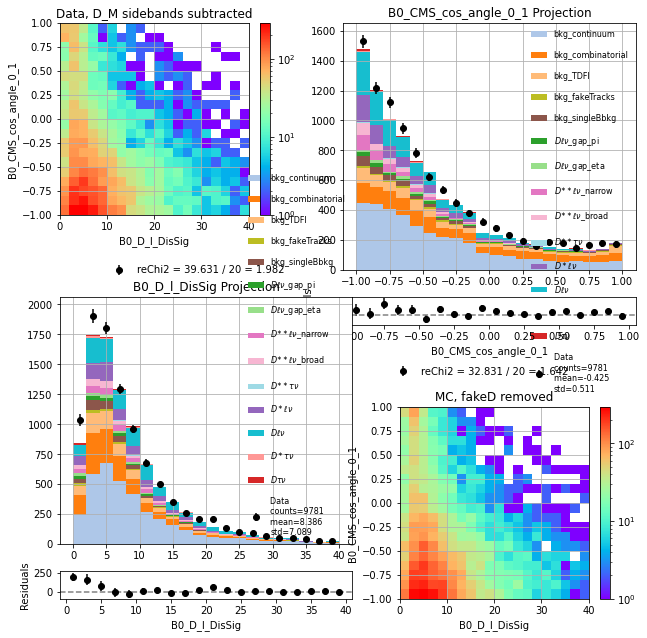

In [17]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,40,21)
b_pDl = np.linspace(-1,1,21)

par_dict={'var_list':['B0_D_l_DisSig','B0_CMS_cos_angle_0_1'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale1,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

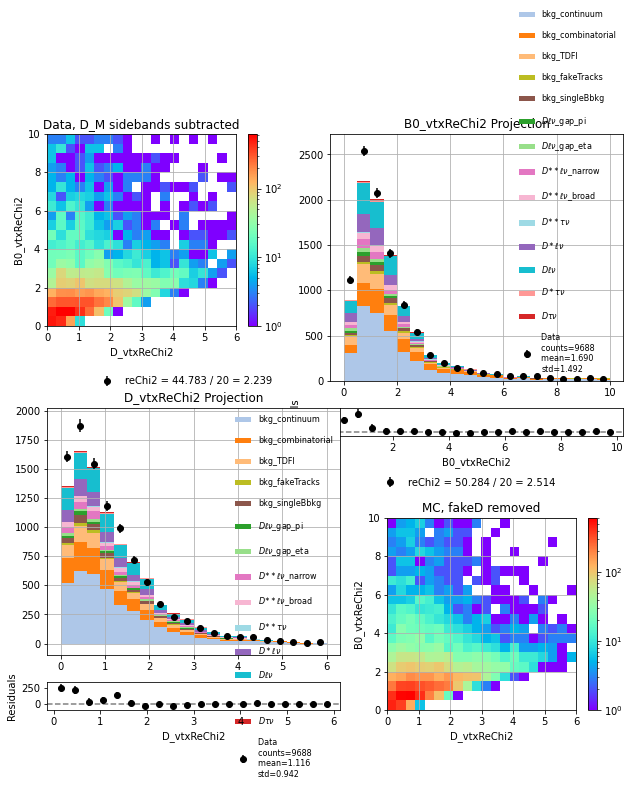

In [18]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,6,21)
b_pDl = np.linspace(0,10,21)

par_dict={'var_list':['D_vtxReChi2','B0_vtxReChi2'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale1,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

### 2. q^2 < 3

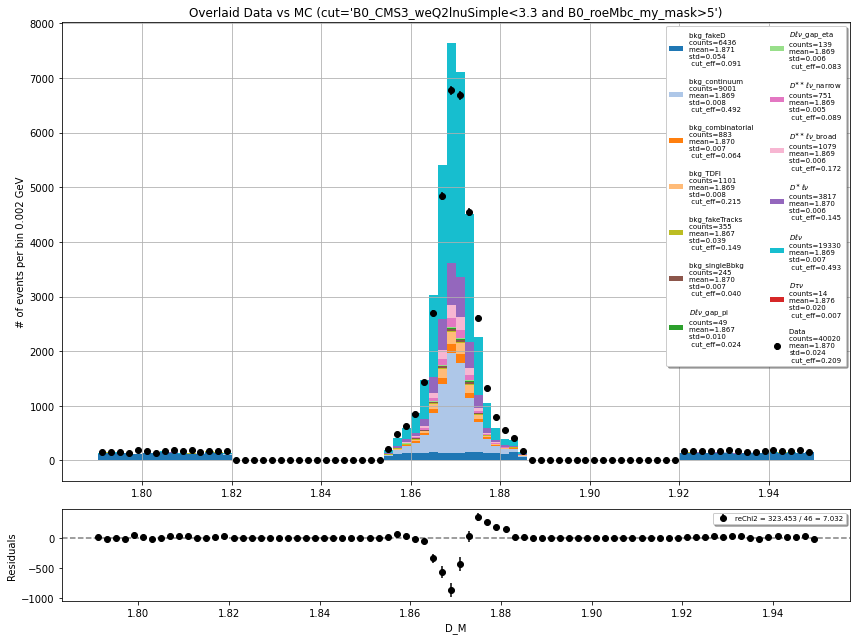

In [8]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,81)
weights={'all_mc':187/200}
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5',correction=False,mask=[],
    figsize=(12,9),ratio=False,legend_nc=2,legend_fs=7,
    weights=weights)

In [85]:
fitter = util.fit_Dmass(x_edges=b1, hist=data_hist_all, poly_only=True)
m_ml, c_ml, result_ml = fitter.fit_gauss_poly_ML(deg=1)
m_ml

initial parameters= [ 3.4700e+01  1.8700e+00  2.0000e-02  1.7333e+04  2.9100e+01 -2.9000e+00]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.48 (chi2/ndof = 1.3)    │              Nfcn = 143              │
│ EDM = 6e-07 (Goal: 0.0002)       │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.00    │   0.35    │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  20.0e-3  │  0.2e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │  4.11e3   │  0.11e3   │            │            │         │         │       │
│ 4 │ x4   │    10     │    80     │            │            │         │         │       │
│ 5 │ x5   │    -2     │    22     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0         0 │
│ x1 │         0         0         0         0         0         0 │
│ x2 │         0         0         0         0         0         0 │
│ x3 │         0         0         0  1.13e+04      28.6        12 │
│ x4 │         0         0         0      28.6  7.01e+03 -1.74e+03 │
│ x5 │         0         0         0        12 -1.74e+03       479 │
└────┴─────────────────────────────────────────────────────────────┘

In [86]:
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)

Yields from 1.79 to 1.82 = 739.216 ± 28.076
Yields from 1.855 to 1.885 = 770.351 ± 19.958
Yields from 1.92 to 1.95 = 801.487 ± 28.455


In [35]:
a = len(df_data_4S_lgb.query('1.79<D_M<1.82 and B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5'))
b = len(df_data_4S_lgb.query('1.92<D_M<1.95 and B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5'))
print('data', a,b)

data 1468 1450


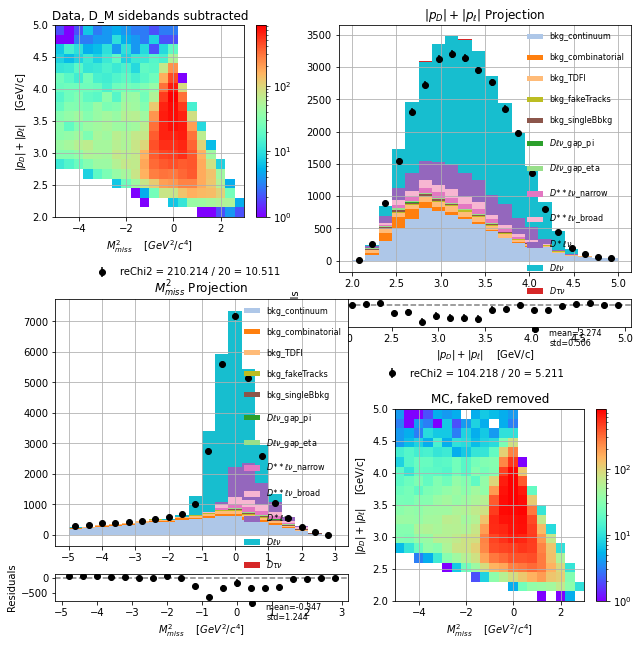

In [9]:
# e channel, lgb_comb
b_mm2 = np.linspace(-5,3,21)
b_pDl = np.linspace(2,5,21)
scale2 = {'data left sideband': 770/739/2,
         'data right sideband': 770/801/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

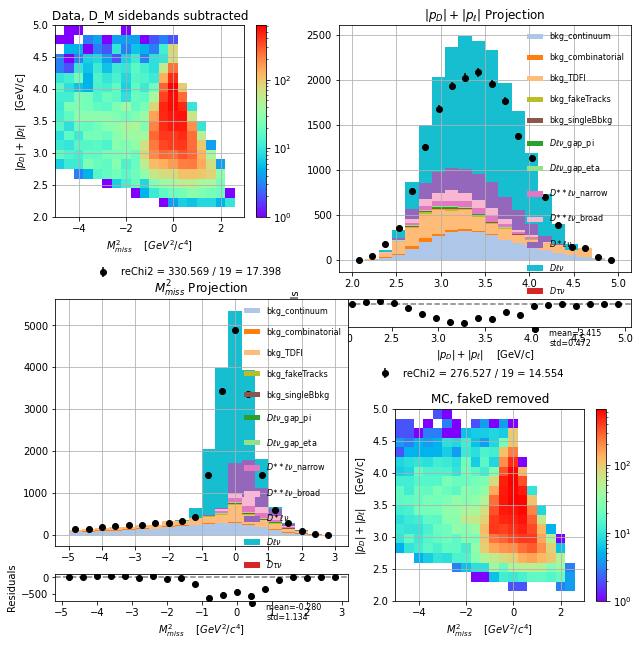

In [64]:
# mu channel, lgb_comb
b_mm2 = np.linspace(-5,3,21)
b_pDl = np.linspace(2,5,21)
scale2 = {'data left sideband': 770/739/2,
         'data right sideband': 770/801/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

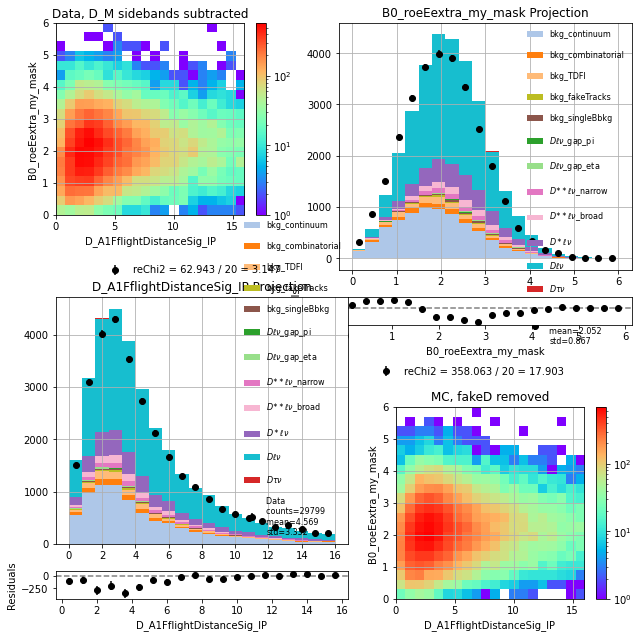

In [10]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,16,21)
b_pDl = np.linspace(0,6,21)

par_dict={'var_list':['D_A1FflightDistanceSig_IP','B0_roeEextra_my_mask'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

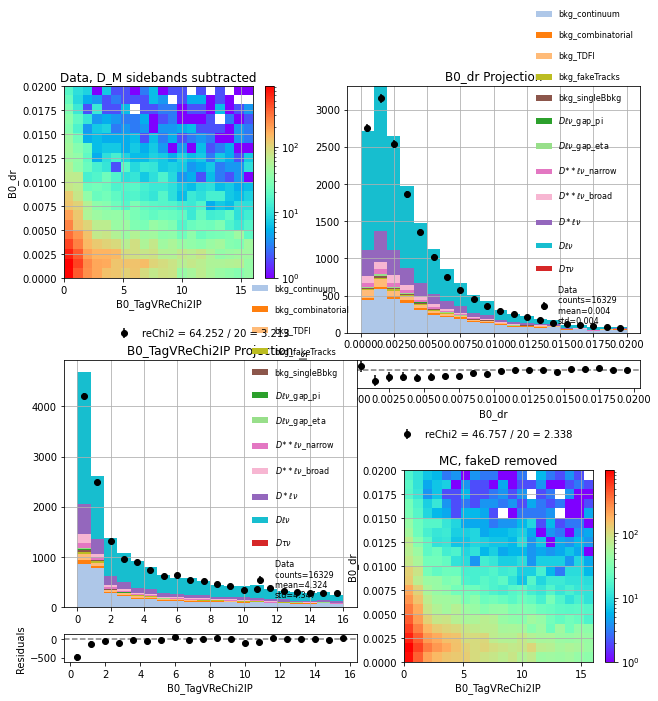

In [11]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,16,21)
b_pDl = np.linspace(0,0.02,21)

par_dict={'var_list':['B0_TagVReChi2IP','B0_dr'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

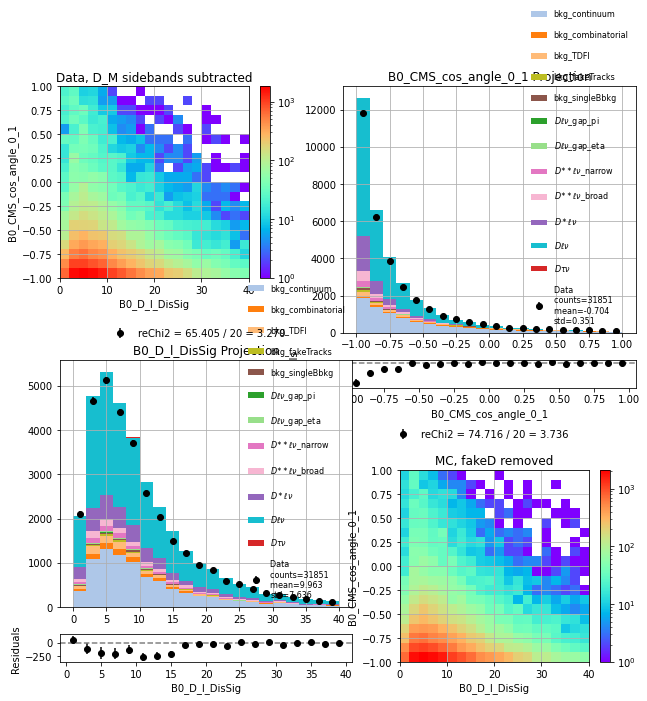

In [12]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,40,21)
b_pDl = np.linspace(-1,1,21)

par_dict={'var_list':['B0_D_l_DisSig','B0_CMS_cos_angle_0_1'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

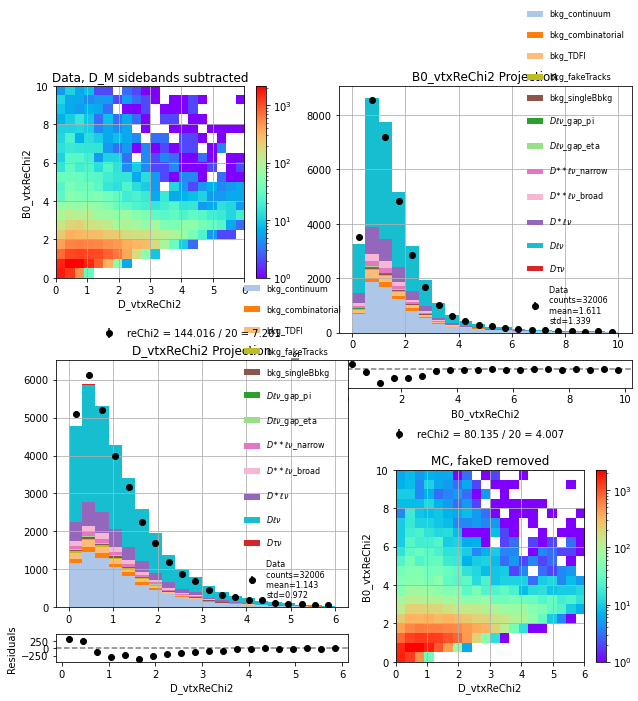

In [13]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,6,21)
b_pDl = np.linspace(0,10,21)

par_dict={'var_list':['D_vtxReChi2','B0_vtxReChi2'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

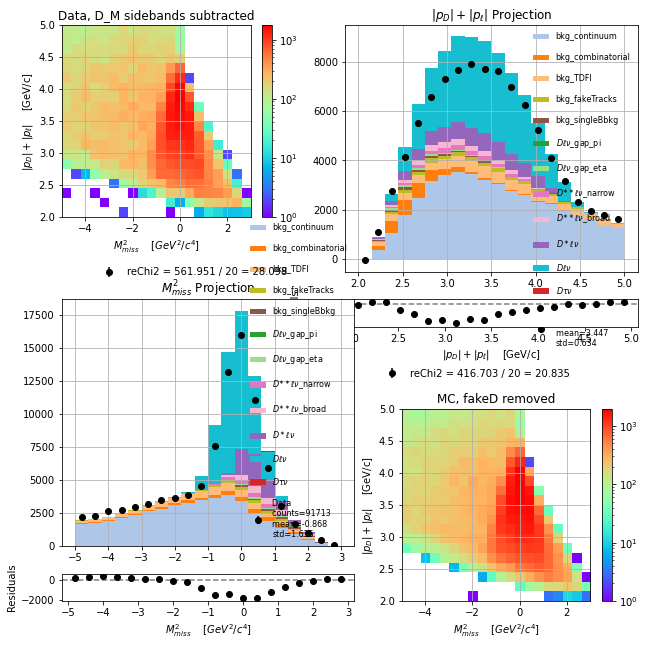

In [32]:
# e channel, lgb_none
b_mm2 = np.linspace(-5,3,21)
b_pDl = np.linspace(2,5,21)
scale2 = {'data left sideband': 770/739/2,
         'data right sideband': 770/801/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

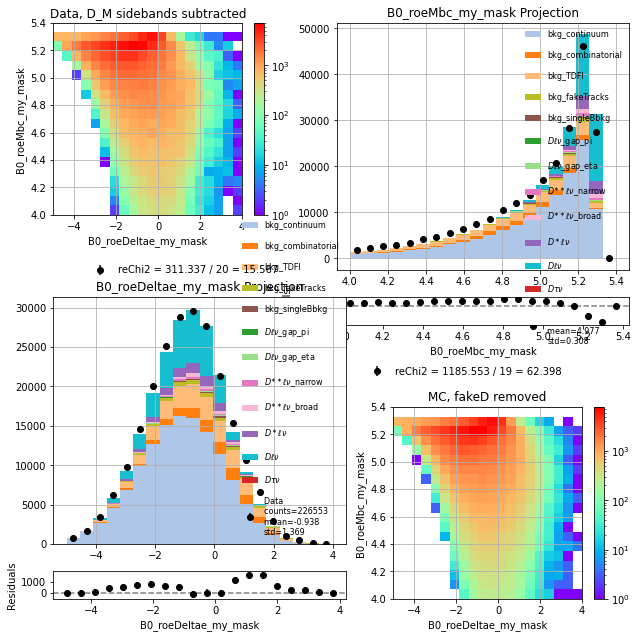

In [38]:
# e channel, lgb_none
b_mm2 = np.linspace(-5,4,21)
b_pDl = np.linspace(4,5.4,21)
scale2 = {'data left sideband': 770/739/2,
         'data right sideband': 770/801/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_roeDeltae_my_mask','B0_roeMbc_my_mask'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>4', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

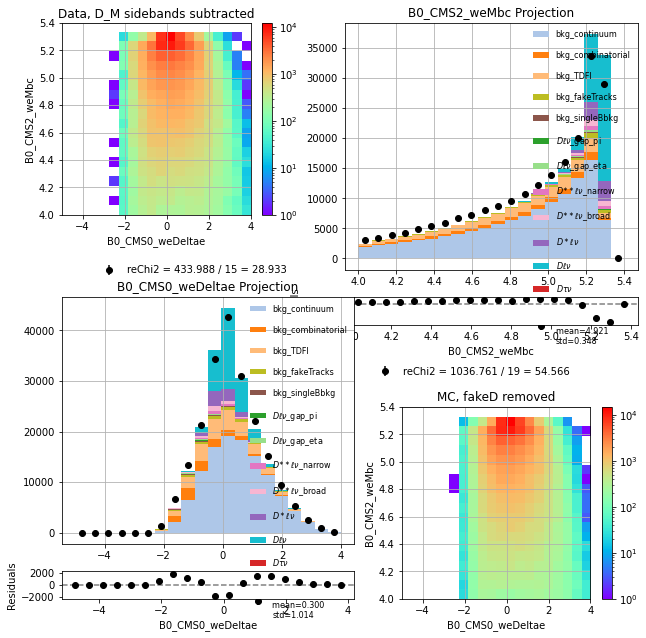

In [39]:
# e channel, lgb_none
b_mm2 = np.linspace(-5,4,21)
b_pDl = np.linspace(4,5.4,21)
scale2 = {'data left sideband': 770/739/2,
         'data right sideband': 770/801/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_CMS0_weDeltae','B0_CMS2_weMbc'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>4', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

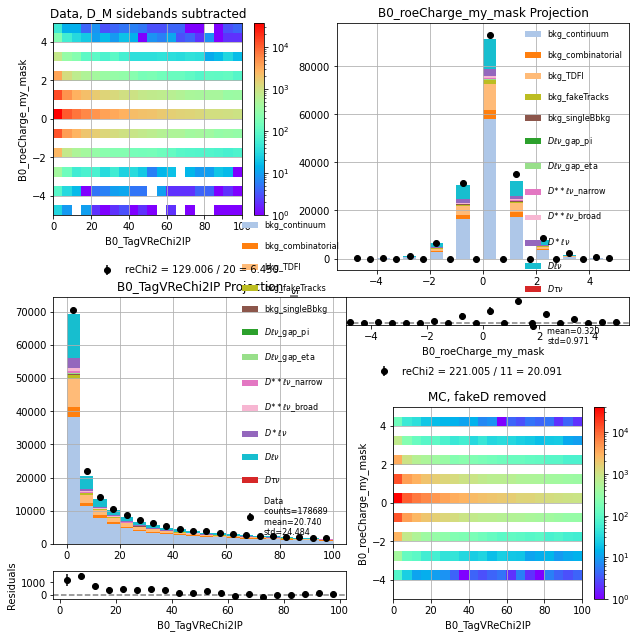

In [50]:
# e channel, lgb_none
b_mm2 = np.linspace(0,100,21)
b_pDl = np.linspace(-5,5,21)
scale2 = {'data left sideband': 770/739/2,
         'data right sideband': 770/801/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_TagVReChi2IP','B0_roeCharge_my_mask'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>4', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

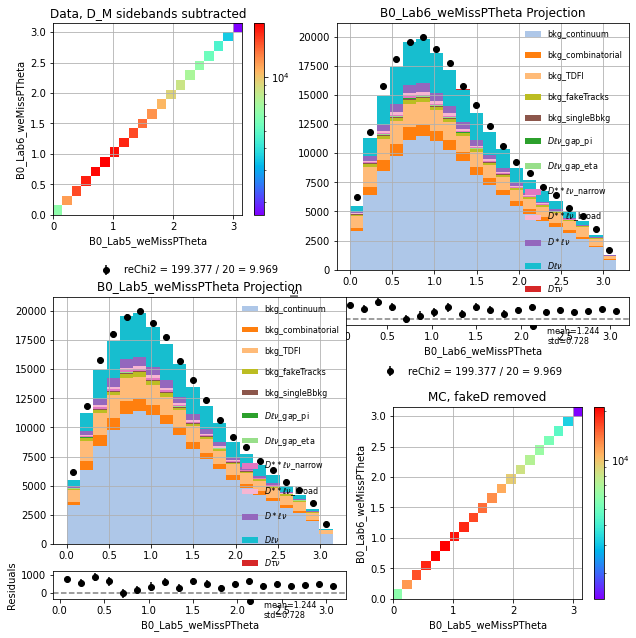

In [55]:
# e channel, lgb_none
b_mm2 = np.linspace(0,3.15,21)
b_pDl = np.linspace(0,3.15,21)
scale2 = {'data left sideband': 770/739/2,
         'data right sideband': 770/801/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_Lab5_weMissPTheta','B0_Lab6_weMissPTheta'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_CMS3_weQ2lnuSimple<3.3 and B0_roeMbc_my_mask>4', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale2,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

### 3. D* veto

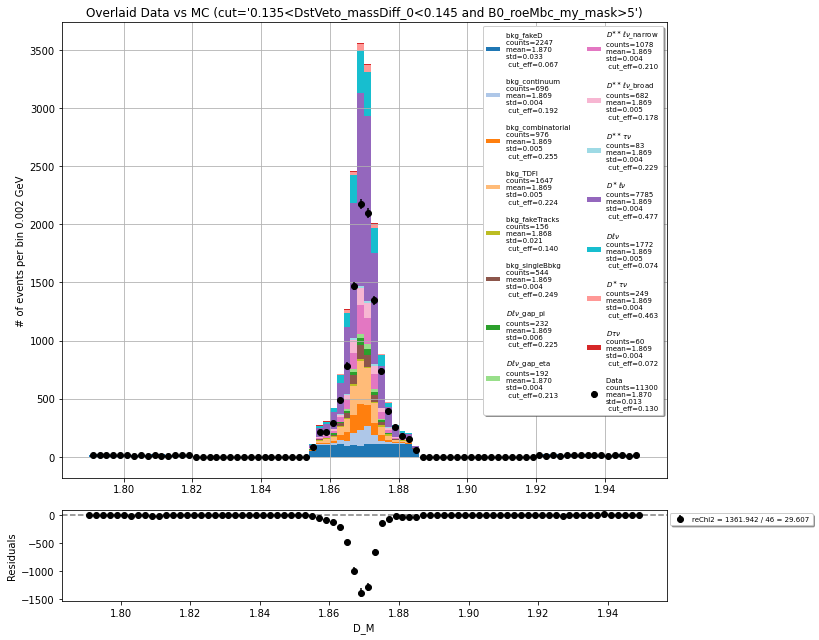

In [102]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,81)
weights={'all_mc':187/200}
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5',correction=False,mask=[],
    figsize=(12,9),ratio=False,legend_nc=2,legend_fs=7,
    weights=weights)

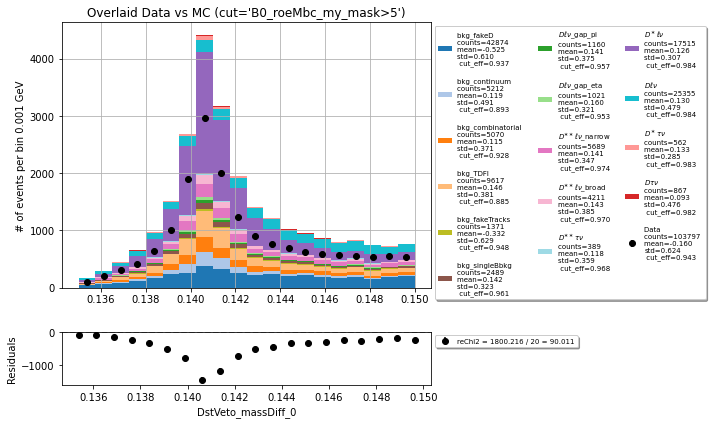

In [41]:
# mu channel
b1 = np.linspace(0.135,0.15,21)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='DstVeto_massDiff_0',bins=b1,
    cut='B0_roeMbc_my_mask>5',
    correction=False,mask=[],figsize=(10,6),ratio=False,
    weights={'all_mc':187/200},legend_nc=3, legend_fs=7)

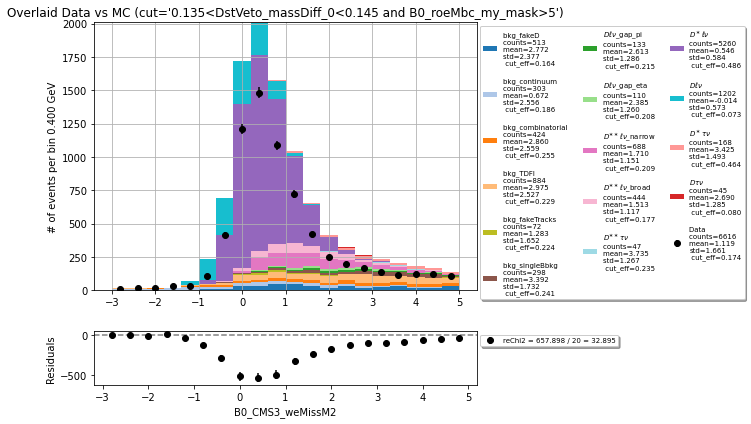

In [14]:
# mu
b1 = np.linspace(-3,5,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                                                      legend_nc=3, legend_fs=7)

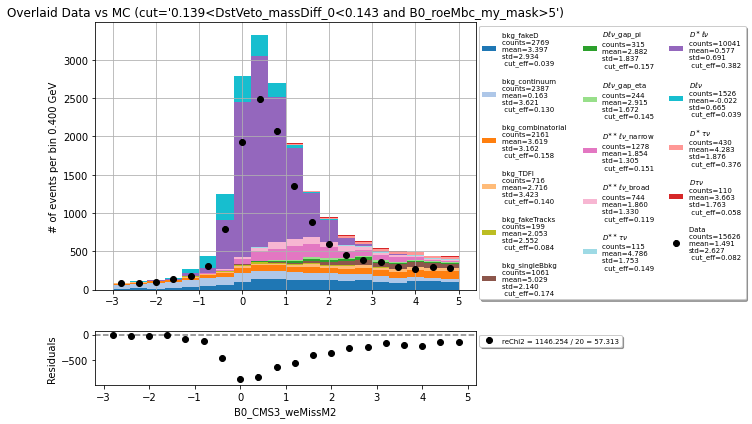

In [60]:
# e
b1 = np.linspace(-3,5,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='0.139<DstVeto_massDiff_0<0.143 and B0_roeMbc_my_mask>5',
                          weights={'all_mc':187/200, 'data':1.3},correction=False,mask=[],ratio=False,
                                                      legend_nc=3, legend_fs=7)

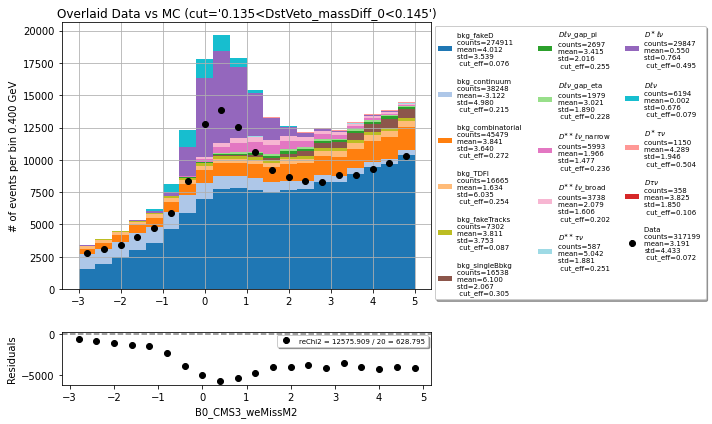

In [22]:
# e, no lgb
b1 = np.linspace(-3,5,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                                                      legend_nc=3, legend_fs=7)

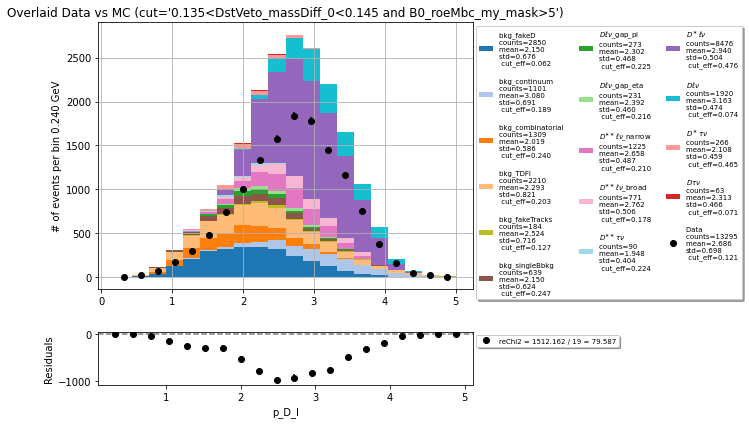

In [42]:
# mu
b2 = np.linspace(0.2,5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

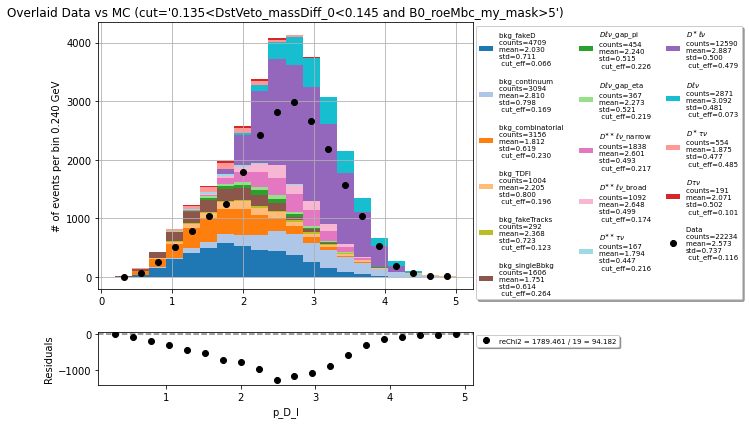

In [7]:
# e
b2 = np.linspace(0.2,5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

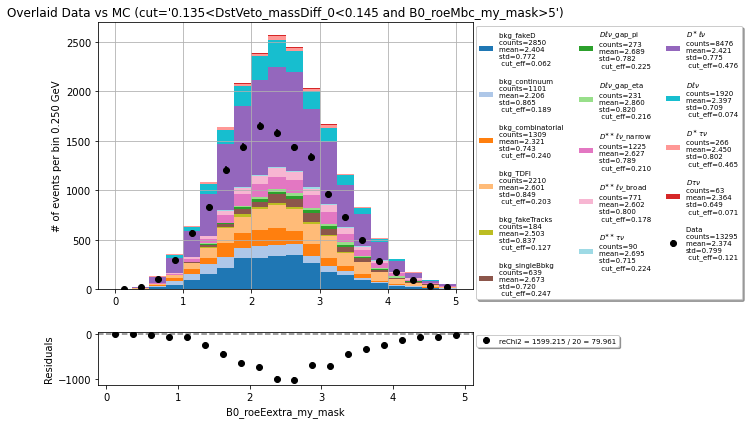

In [43]:
# signal
b2 = np.linspace(0,5,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_roeEextra_my_mask',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

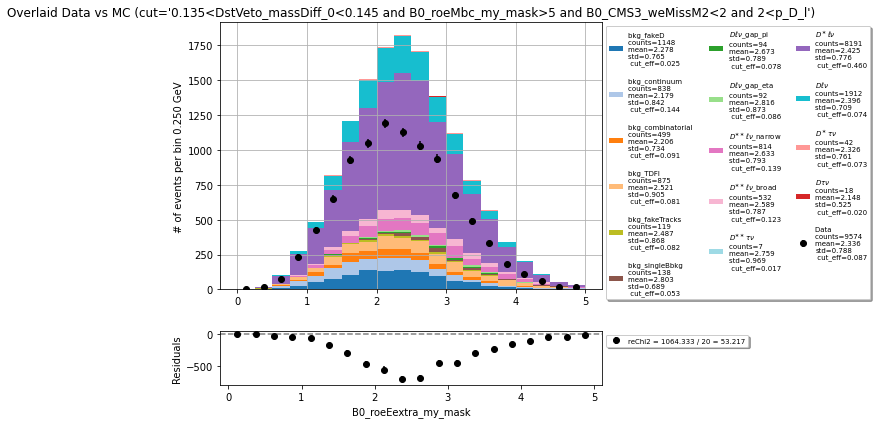

In [44]:
# mu
b2 = np.linspace(0,5,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_roeEextra_my_mask',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

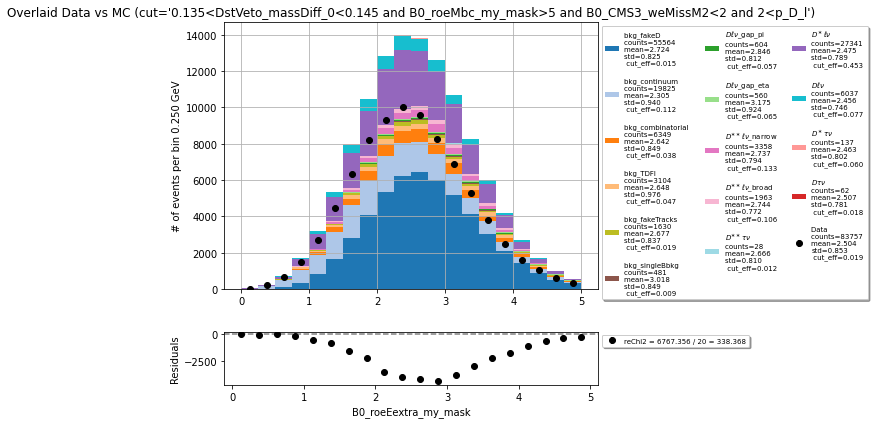

In [23]:
# e
b2 = np.linspace(0,5,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_roeEextra_my_mask',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

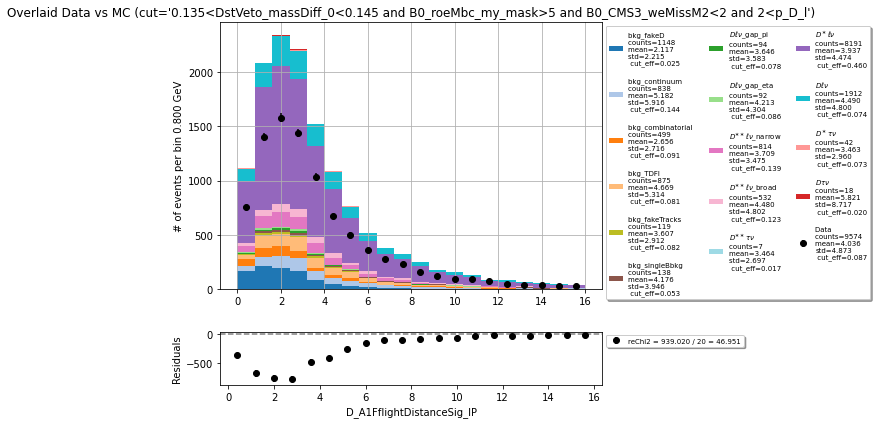

In [45]:
# mu
b2 = np.linspace(0,16,21)
a,b=mpl.plot_data_mc_stacked(variable='D_A1FflightDistanceSig_IP',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

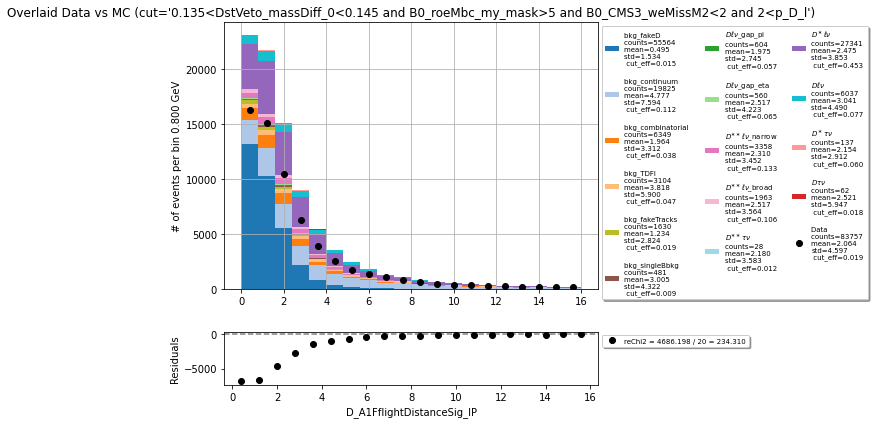

In [24]:
# e
b2 = np.linspace(0,16,21)
a,b=mpl.plot_data_mc_stacked(variable='D_A1FflightDistanceSig_IP',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

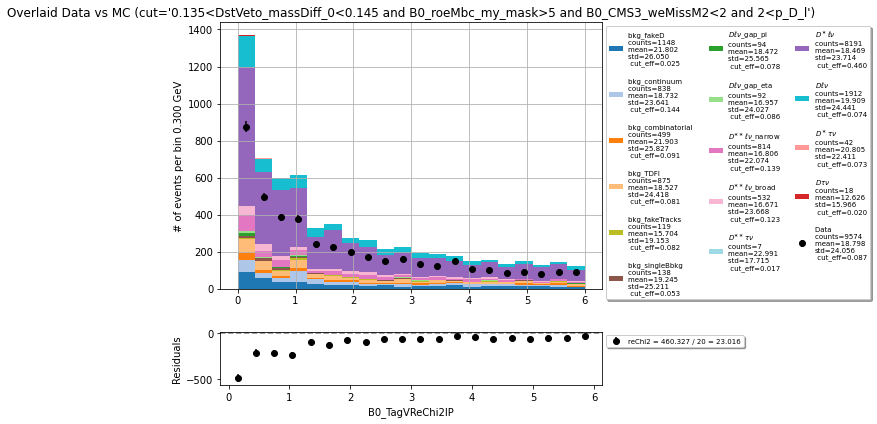

In [46]:
# mu
b2 = np.linspace(0,6,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_TagVReChi2IP',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

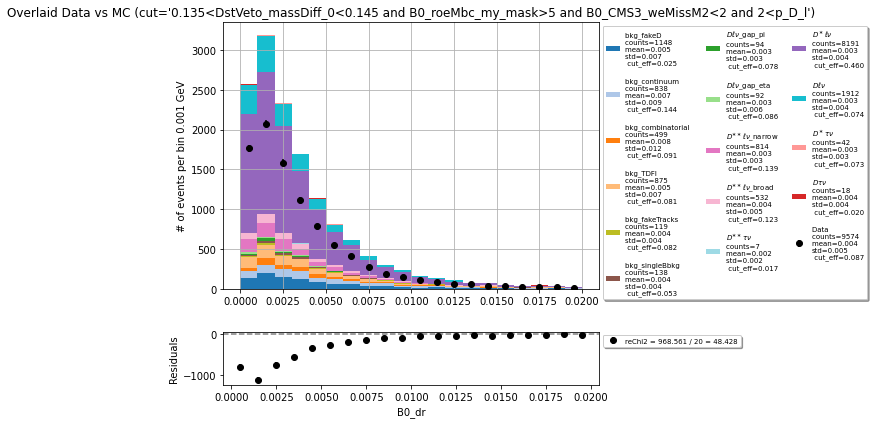

In [47]:
# signal
b2 = np.linspace(0,0.02,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_dr',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

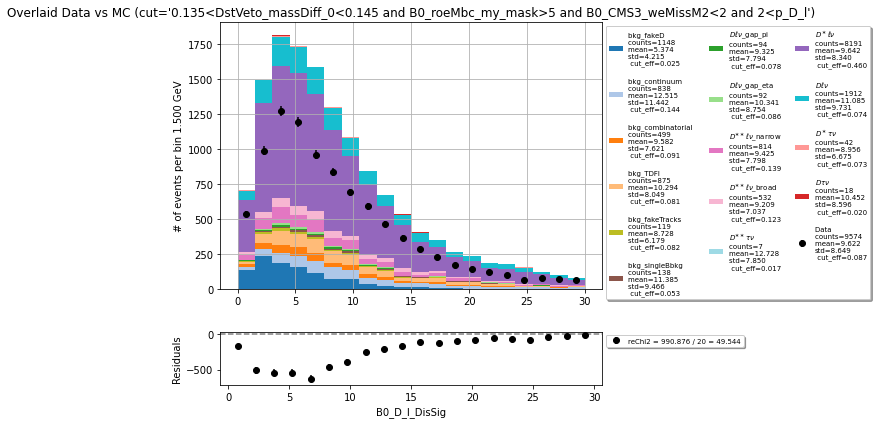

In [48]:
# signal
b2 = np.linspace(0,30,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_D_l_DisSig',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

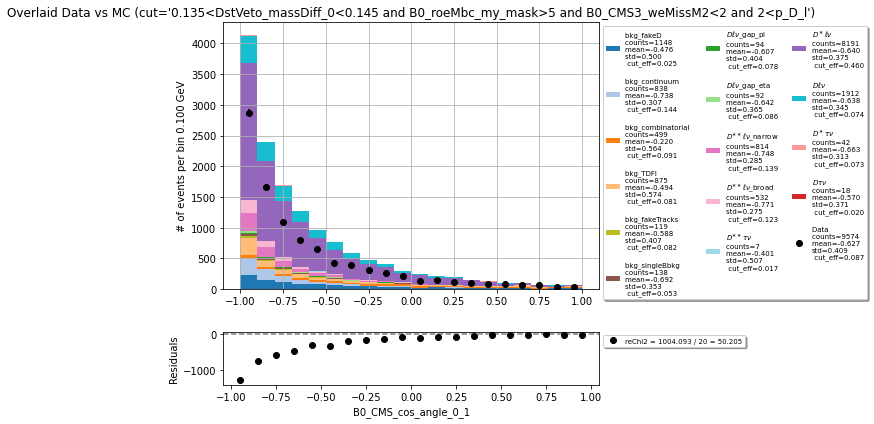

In [49]:
# signal
b2 = np.linspace(-1,1,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS_cos_angle_0_1',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

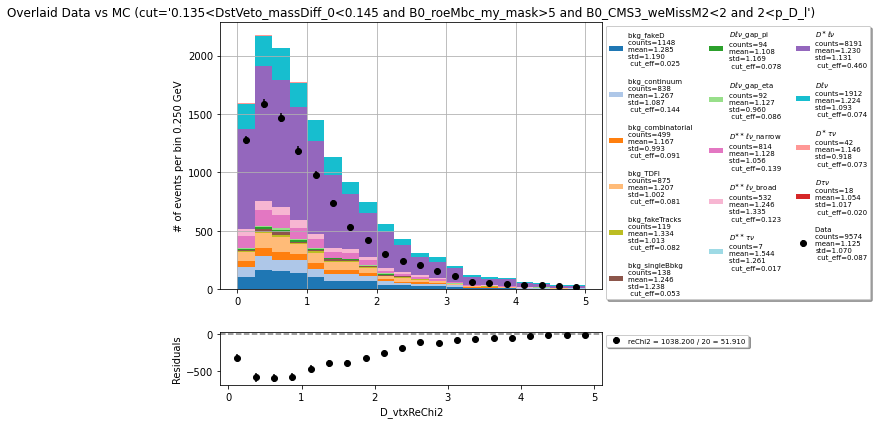

In [50]:
# signal
b2 = np.linspace(0,5,21)
a,b=mpl.plot_data_mc_stacked(variable='D_vtxReChi2',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)

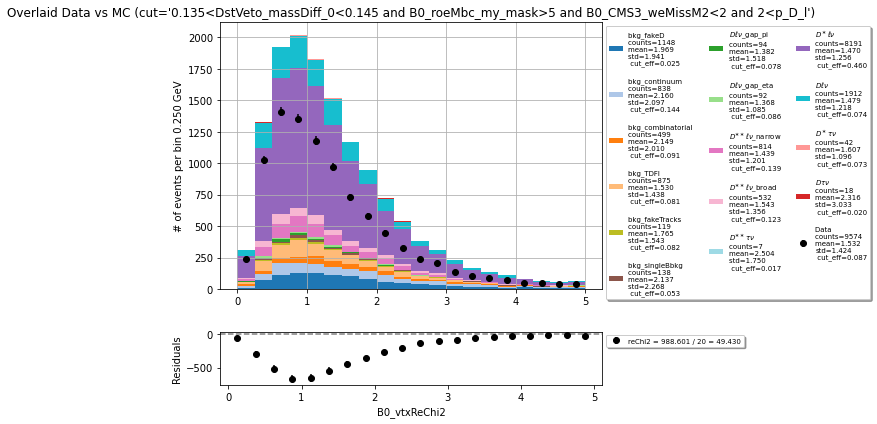

In [51]:
# signal
b2 = np.linspace(0,5,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_vtxReChi2',bins=b2,figsize=(10,6),
                          cut='0.135<DstVeto_massDiff_0<0.145 and B0_roeMbc_my_mask>5 and B0_CMS3_weMissM2<2 and 2<p_D_l',
                          weights={'all_mc':187/200},correction=False,mask=[],ratio=False,
                          legend_nc=3, legend_fs=7)